   SK01  SK02   sign
0     0     4  False
1     1     5   True
2     2     6  False
3     3     7  False
    sign Error  Times
0  False  SK01      0
1   True  SK01      1
2  False  SK01      2
3  False  SK01      3
4  False  SK02      4
5   True  SK02      5
6  False  SK02      6
7  False  SK02      7


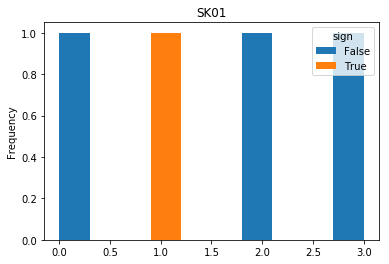

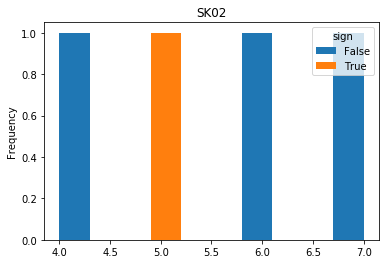

In [4]:
%matplotlib inline
#%matplotlib nbagg

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

df2 = pd.DataFrame({'SK01': np.arange(4),
                    'SK02': np.arange(4,8)})

def cal_sign(row):
    if (row['SK01'] + row['SK02']) % 3 == 0:
        return True
    else:
        return False

df2['sign'] = [cal_sign(row) for _, row in df2.iterrows()]

print(df2)

column_err = list(df2.columns[:2])
column_cls = list(df2.columns[2:])

#print(column_err, column_cls)

df3 = pd.melt(df2, id_vars=column_cls, value_vars=column_err,
             var_name='Error', value_name='Times')

print(df3)

#sns.factorplot(x='Error', y='Times', data=df3, hue='sign', kind='swarm')
#sns.factorplot(x='Error', y='Times', data=df3, hue='sign', kind='box')
#sns.pairplot(df2, hue='sign')
#sns.jointplot(x='SK01', y='SK02', data=df2)
#sns.distplot(df3, kde=True, rug=True)


# ヒストグラムは関数を作るしかないらしい
def targethist(df, target, kind='hist', **kwards):
    columns = df.columns[df.columns != target]
    pdf = df.pivot_table(index=df.index, columns=target)
    #print(pdf)
    for column in columns:
        ax = pdf.loc[:, column].plot(kind=kind, title=column, **kwards)

targethist(df2, target='sign')


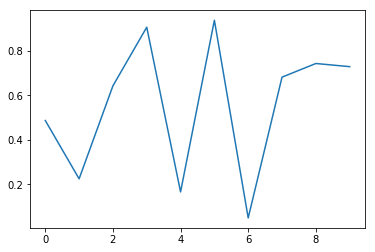

In [5]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

def onclick(event):
    print('event.button={}, event.x={}, event.y={}, event.xdata={}, event.ydata={}'.\
          format(event.button, event.x, event.y, event.xdata, event.ydata))
    
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()